In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

import spacy
from spacy.lang.en import English

from simpletransformers.classification import ClassificationModel

import logging


In [2]:
PATH = 'data/'
biz=pd.read_csv(os.path.join(PATH,"yelp_business.csv"))
reviews=pd.read_csv(os.path.join(PATH,"yelp_review.csv"))

In [3]:


col = ['neighborhood', 'address', 'latitude', 'longitude', 'stars']
biz.drop(columns=col, inplace=True)    

biz.categories = biz.categories.apply(lambda x: x.split(";"))

biz = biz[
    (biz.city == 'Cleveland') & 
    (biz.state == 'OH') & 
    (biz.is_open == 1) & 
    (biz.categories.apply(
        lambda x: True if 'Restaurants' in x else False
    ))]



In [4]:
df = pd.merge(reviews, biz, how='inner', on='business_id')

In [7]:
df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,city,state,postal_code,review_count,is_open,categories
0,OPZsR2jCG72uoDNjU71DQQ,qYbWTWH5leltA0bzWAOnmA,meXjqyhTNLFmknY39y2sMg,5,2014-09-11,Solid beers -- Christmas Ale defines my holida...,1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
1,fxGwEiSYDtAen8BNuVGGxg,8Az_JgEpXqAii_5EDkw2tw,meXjqyhTNLFmknY39y2sMg,3,2013-10-13,Meh. It was OK. A bartender the night before...,0,1,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
2,Gweb4pADeQ26WnaiKEZ7GQ,T9tEic49JZjN4nCUcDvrRQ,meXjqyhTNLFmknY39y2sMg,4,2014-01-15,"Oh Christmas Ale, oh Christmas Ale, how lovely...",1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
3,P1vhwPI56SeZEz10ywaS7w,W1p8_CFW5FISSihmQo5Qzw,meXjqyhTNLFmknY39y2sMg,3,2012-02-09,What is the big deal about this place? The foo...,2,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
4,1kQvQlBX0V5_rGddBh9-rQ,Y_PP05RRdzbKRYfDCCfh8w,meXjqyhTNLFmknY39y2sMg,5,2017-04-30,Great Lakes Brewing Company is one of my favor...,0,0,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56905,0vzkpZuQKms6FW8VoJwwGA,pCeiu_FRmS_F_UNGfqiikg,xJfM3UbnaQkLPEMZgLNuyQ,3,2017-11-09,This Wendy's in the past was deserving of one ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56906,dUHdSKwCkU-pIuTGJBqt7A,aw2m9p2dPo5OXIx4pQGUPg,xJfM3UbnaQkLPEMZgLNuyQ,4,2016-10-20,I went to get a taco salad because I heard so ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56907,CMTHLl4s03tES0Nfskuspg,ORceu2UCCWxyRzvoElYotw,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-02-13,I can't call Number 1 Kitchen the worst Chines...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"
56908,IP1_iBoZ9fb3Rp5WqS8uAw,bOFmXLfqyLYbvuo_52bdgQ,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-03-23,My family and I have been ordering food from h...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"


In [5]:
df_polar = df[df.stars.isin([1,5])]
df_polar = df_polar[['text', 'stars']]

In [6]:
df_polar = df_polar.sample(2000,weights=1/df_polar.stars)

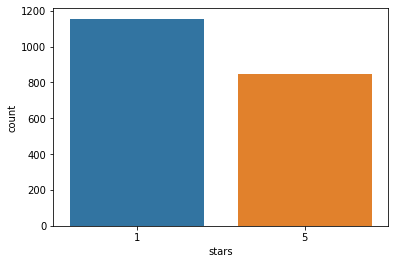

In [7]:
sns.countplot(df_polar.stars);

In [8]:
df_polar

,text,stars
27779,Almost 3 years since my initial review and I s...,5
56092,Can't find anything nice to say. When I walked...,1
32087,Food selection was just okay! Everything was p...,1
10356,This is hands down the best BBQ in all of Ohio...,5
15691,I love Momocho. What a gem. And right here in ...,5
...,...,...
56808,I order a delivery of one medium pizza online ...,1
15552,Don't bother coming here without reservations....,1
5950,Incredible meal and service. Arranged a chef'...,5
6703,Waited too long for my pizza to arrive and man...,1


In [9]:



nlp = English()  # just the language with no model
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
doc = nlp.pipe(df_polar.text, n_process=12, batch_size=100)
#col_list = ['sents', 'score']
#df_sents = pd.DataFrame(columns=col_list)
#df_polar['splits'] = list(doc)




In [10]:
df_polar_sents = pd.DataFrame(columns=['sent', 'score', 'og_text'])
for dfp, dc in tqdm(zip(df_polar.iterrows(), doc), total=len(df_polar)):

    for sent in dc.sents:
        strr = dfp[1].stars
        strr = 1 if strr == 5 else 0
        snt = sent.string
        df_temp = pd.Series({'sent': snt, 'score': strr, 'og_text':dfp[1].text })
        df_polar_sents = df_polar_sents.append(df_temp, ignore_index=True)
doc.close()

In [12]:
df_polar_sents['sent'] = df_polar_sents.sent.str.strip()


In [13]:
df_polar_sents

,sent,score,og_text
0,Almost 3 years since my initial review and I s...,1,Almost 3 years since my initial review and I s...
1,A craving tends to pop up for me that I just c...,1,Almost 3 years since my initial review and I s...
2,I've taken so many friends and family over the...,1,Almost 3 years since my initial review and I s...
3,A few updates since last time: \n\n- There are...,1,Almost 3 years since my initial review and I s...
4,"Both are decorated simply, yet pretty and invi...",1,Almost 3 years since my initial review and I s...
...,...,...,...
16306,Waited too long for my pizza to arrive and man...,0,Waited too long for my pizza to arrive and man...
16307,If you want to wait 2.5 hours for your order a...,0,Waited too long for my pizza to arrive and man...
16308,Impeccable service and the eggplant rollup was...,1,Impeccable service and the eggplant rollup was...
16309,The only thing better was the Christmas Ale ic...,1,Impeccable service and the eggplant rollup was...


In [17]:
model_args = {
    "num_train_epochs": 2,
}

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args
)

In [18]:

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [20]:
model.train_model(df_polar_sents[['sent', 'score']].sample(100))

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
Current iteration:   0%|          | 0/13 [00:00<?, ?it/s]Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Running loss: 0.719671
Running loss: 0.704027
Running loss: 0.727700
Running loss: 0.687399
Running loss: 0.716179
Running loss: 0.689016
Runnin

In [62]:
import gc
del model
gc.collect()

22498